In [15]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.animation as anim
from tqdm import tqdm 

In [16]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
            
        return timeup

In [17]:
def GetPlanetas(t):
    
    Mercurio = Planeta(0.2056,0.307,t)
    Venus = Planeta(0.0067,0.7233,t)
    Tierra = Planeta(0.01671,1.,t)
    Marte=Planeta(0.0935,1.5240,t)
    Jupiter=Planeta(0.0487,5.2044,t)
    
    return [Mercurio,Venus,Tierra,Marte,Jupiter]

In [18]:
dt = 0.001
tmax = 25
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [19]:
def RunSimulation(t,Planetas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Planetas

In [20]:
Planetas = RunSimulation(t,Planetas)


Running simulation: 100%|██████████| 25000/25000 [00:02<00:00, 11019.92 Steps/s]


<IPython.core.display.Javascript object>


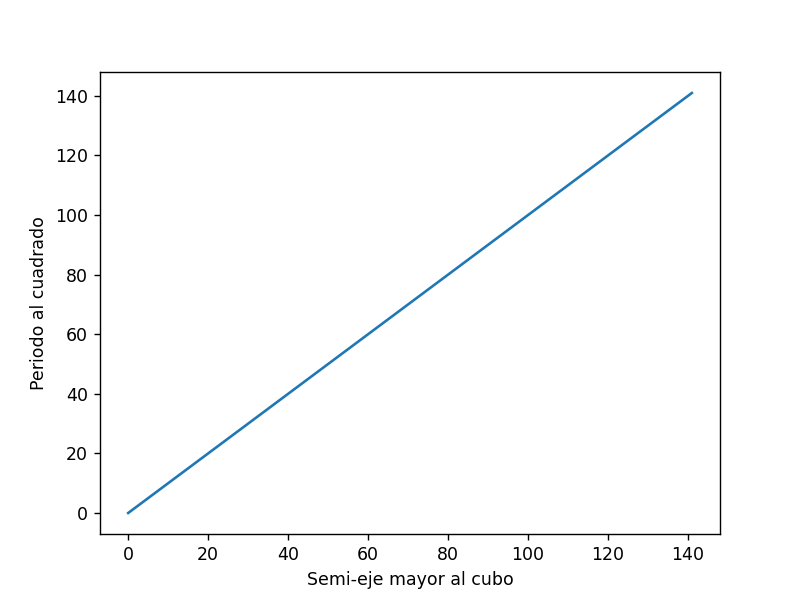

Pendiente: 0.9998500379007778
Punto de corte: 0.0002756418814229278
Masa del sol en unidades gausiana: 1.0001499845912265
Masa del sol en unidades del sistema internacional: 1.988768239860116e+30 Kg


In [21]:
Perihelio_mercurio=Planetas[0].GetPerihelio()
Perihelio_venus=Planetas[1].GetPerihelio()
Perihelio_tierra=Planetas[2].GetPerihelio()
Perihelio_marte=Planetas[3].GetPerihelio()
Perihelio_jupiter=Planetas[4].GetPerihelio()

Periodos_cuadrados=[]

T_2_mercurio=(Perihelio_mercurio[0]-Perihelio_mercurio[1])**2
T_2_venus=(Perihelio_venus[0]-Perihelio_venus[1])**2
T_2_tierra=(Perihelio_tierra[0]-Perihelio_tierra[1])**2
T_2_marte=(Perihelio_marte[0]-Perihelio_marte[1])**2
T_2_jupiter=(Perihelio_jupiter[0]-Perihelio_jupiter[1])**2

Periodos_cuadrados.append(T_2_mercurio)
Periodos_cuadrados.append(T_2_venus)
Periodos_cuadrados.append(T_2_tierra)
Periodos_cuadrados.append(T_2_marte)
Periodos_cuadrados.append(T_2_jupiter)

Semi_ejes_mayor_al_cubo=[(0.307)**3,(0.7233)**3,(1.)**3,(1.5240)**3,(5.2044)**3]

plt.plot(Semi_ejes_mayor_al_cubo,Periodos_cuadrados)
plt.xlabel("Semi-eje mayor al cubo")
plt.ylabel("Periodo al cuadrado")


slope, intercept, r_value, p_value, std_err = linregress(Semi_ejes_mayor_al_cubo, Periodos_cuadrados)
print("Pendiente:", slope)
print("Punto de corte:", intercept)


plt.show()

Masa_sol_u_gausianas = 1/slope
print("Masa del sol en unidades gausiana:", Masa_sol_u_gausianas)

Masa_sol_u_SI = Masa_sol_u_gausianas*1.98847e30
print("Masa del sol en unidades del sistema internacional:", Masa_sol_u_SI ,"Kg")